# Problem 1, Parameter initialization
This notebook aims to visualize the importance of parameter initialization. The initialization step can be critical to the model’s ultimate performance, and it requires the right method.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utils

# Task 0 - Create a simple Neural Network

This task isn't focused around creating the neural network, so I'll provide a framework for creating neural networks.

In [2]:
class Layer:
    def __init__(self):
        self.input = None
        self.output = None
        
    def forward(self, input):
        pass

    def backward(self, output_gradient, learning_rate):
        pass

In [3]:
class Dense(Layer):
    def __init__(self, input_size, output_size, init_weights, init_bias):
        self.weights = init_weights(output_size, input_size)
        self.bias = init_bias(output_size)
    
    def forward(self, input):
        self.input = input
        return np.dot(self.weights, self.input) + self.bias
    
    def backward(self, output_gradient, learning_rate):
        # Update params and return input gradient
        weights_gradient = np.dot(output_gradient, self.input.T)
        self.weights -= learning_rate * weights_gradient
        self.bias -= learning_rate * output_gradient
        return np.dot(self.weights.T, output_gradient)

In [4]:
class Activation(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime
    
    def forward(self, input):
        self.input = input
        return self.activation(self.input)
    
    def backward(self, output_gradient, learning_rate):
        return np.multiply(output_gradient, self.activation_prime(self.input))

In [5]:
class Linear(Activation):
    def __init__(self):
        super().__init__(lambda x: x, lambda x: 1)

class Tanh(Activation):
    def __init__(self):
        tanh = lambda x: np.tanh(x)
        tanh_prime = lambda x: 1 - np.tanh(x)**2
        super().__init__(tanh, tanh_prime)

class Sigmoid(Activation):
    def __init__(self):
        def sigmoid(x):
            return 1 / (1 + np.exp(-x))
        
        def sigmoid_prime(x):
            s = sigmoid(x)
            return s * (1 - s)
            
        super().__init__(sigmoid, sigmoid_prime)

In [6]:
def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2 * (y_pred - y_true) / np.size(y_true)

# Task 1

### Given
- output_size and input_size of the neural network and an example of `uniform_init`, `too_large`, `too small`
- Xavier-initialization equation: $W^{[l]} \sim \mathcal{N}(\mu=0,\sigma^2 = \frac{1}{n^{[l-1]}})$ where $n^{[l-1]}$ is the number of neuron in layer $l - 1$, and the biases as zero: $b^{[l]} = 0$.

### Find
- Implement the initialization methods for zeros, ones and xavier

### Solution
Zeros and ones are easily implemented by leveraging numpy's `np.zeros` and `np.ones`. The Xavier-initialization initializes the weights from a distribution: $W^{[l]} \sim \mathcal{N}(\mu=0,\sigma^2 = \frac{1}{n^{[l-1]}})$ where $n^{[l-1]}$ is the number of neuron in layer $l - 1$, and the biases as zero: $b^{[l]} = 0$.

In [7]:
def uniform_init(output_size, input_size = 1):
    return np.random.uniform(-1, 1, (output_size, input_size))

def zeros_init(output_size, input_size = 1):
    return np.zeros((output_size, input_size))

def ones_init(output_size, input_size = 1):
    return np.ones((output_size, input_size))

def too_small_init(output_size, input_size = 1):
    return np.ones((output_size, input_size)) * 0.5

def too_large_init(output_size, input_size = 1):
    return np.ones((output_size, input_size)) * 1.5

def xavier_init(output_size, input_size = 1):
    return np.random.randn(output_size, input_size) / input_size

### Training the neural network on XOR-dataset

In [8]:
X = np.reshape([[0,0], [0,1], [1,0], [1,1]], (4, 2, 1))
Y = np.reshape([[0], [1], [1], [0]], (4, 1, 1))

# Task 2 - Impact of parameter initialization

### Given
- Methods for initializing parameters that are *zero, too small, too large, uniform or xavier*
- XOR-dataset
- Function for training a neural network
- Function for visualizing the loss
- A NN with the following architecture:

| Layer | Output Shape | Activation function |
|:-----:|:------------:|---------------------|
| Input |    (2, 2)    |         Tanh        |
| Dense |    (2, 2)    |         Tanh        |
| Dense |    (2, 2)    |         Tanh        |
| Dense |    (2, 2)    |         Tanh        |
| Dense |    (2, 2)    |         Tanh        |
| Dense |    (2, 2)    |         Tanh        |
| Dense |    (2, 2)    |         Tanh        |
| Dense |    (2, 2)    |         Tanh        |
| Dense |    (2, 1)    |       Sigmoid       |

### Find
- The impact of this initialization by training 5 different deep neural networks, initialized with the different methods, for 20 000 epochs.
- Visualize the loss

### Solution
We will create 5 different networks, each with a different parameter initialization. We will then train the networks and plot the loss, providing a qualitative comparison of the different initialization-methods.


In [9]:
LEARNING_RATE = 0.01
EPOCHS = 20000
VISUALIZE_INTERVAL = 100

def create_deep_network(weight_init_method, bias_init_method):
    return [
        Dense(2, 2, weight_init_method, bias_init_method),
        Tanh(),
        Dense(2, 2, weight_init_method, bias_init_method),
        Tanh(),
        Dense(2, 2, weight_init_method, bias_init_method),
        Tanh(),
        Dense(2, 2, weight_init_method, bias_init_method),
        Tanh(),
        Dense(2, 2, weight_init_method, bias_init_method),
        Tanh(),
        Dense(2, 2, weight_init_method, bias_init_method),
        Tanh(),
        Dense(2, 2, weight_init_method, bias_init_method),
        Tanh(),
        Dense(2, 2, weight_init_method, bias_init_method),
        Tanh(),
        Dense(2, 1, weight_init_method, bias_init_method),
        Sigmoid()
    ]

network_zero_weights = create_deep_network(zeros_init, zeros_init)
network_large_weights = create_deep_network(too_large_init, zeros_init)
network_small_weights = create_deep_network(too_small_init, zeros_init)
network_uniform_weights = create_deep_network(uniform_init, zeros_init)
network_xavier_weights = create_deep_network(xavier_init, zeros_init)

In [10]:
def train(network):
    error_history = []
    for epoch in range(EPOCHS):
        error = 0
        for x, y in zip(X, Y):
            # Forward pass
            output = x
            for index, layer in enumerate(network):
                output = layer.forward(output)
            
            # Calculate error
            error += mse(y, output)

            # Backward pass
            grad = mse_prime(y, output)
            
            for layer in reversed(network):
                grad = layer.backward(grad, LEARNING_RATE)
            
        error /= len(X)
        error_history.append(error)
        
        if (epoch % VISUALIZE_INTERVAL == 0):
            print(f"Epoch {epoch}, error: {error}")
    return error_history

error_history_zero_weights = train(network_zero_weights)
error_history_large_weights = train(network_large_weights)
error_history_small_weights = train(network_small_weights)
error_history_uniform_weights = train(network_uniform_weights)
error_history_xavier_weights = train(network_xavier_weights)

Epoch 0, error: 0.2503126951492298
Epoch 100, error: 0.2503126951491338
Epoch 200, error: 0.2503126951490985
Epoch 300, error: 0.2503126951490855
Epoch 400, error: 0.2503126951490806
Epoch 500, error: 0.25031269514907883
Epoch 600, error: 0.25031269514907817
Epoch 700, error: 0.25031269514907795
Epoch 800, error: 0.2503126951490778
Epoch 900, error: 0.2503126951490778
Epoch 1000, error: 0.2503126951490778
Epoch 1100, error: 0.25031269514907784
Epoch 1200, error: 0.2503126951490778
Epoch 1300, error: 0.2503126951490778
Epoch 1400, error: 0.2503126951490778
Epoch 1500, error: 0.2503126951490778
Epoch 1600, error: 0.2503126951490777
Epoch 1700, error: 0.2503126951490777
Epoch 1800, error: 0.2503126951490777
Epoch 1900, error: 0.25031269514907784
Epoch 2000, error: 0.2503126951490778
Epoch 2100, error: 0.2503126951490778
Epoch 2200, error: 0.2503126951490777
Epoch 2300, error: 0.2503126951490777
Epoch 2400, error: 0.2503126951490778
Epoch 2500, error: 0.2503126951490778
Epoch 2600, error: 

Epoch 1400, error: 0.25093258135886215
Epoch 1500, error: 0.25093258189263595
Epoch 1600, error: 0.25093258242632704
Epoch 1700, error: 0.25093258295993326
Epoch 1800, error: 0.2509325834934541
Epoch 1900, error: 0.2509325840268894
Epoch 2000, error: 0.25093258456023926
Epoch 2100, error: 0.2509325850935036
Epoch 2200, error: 0.2509325856266824
Epoch 2300, error: 0.2509325861597758
Epoch 2400, error: 0.2509325866927838
Epoch 2500, error: 0.2509325872257064
Epoch 2600, error: 0.25093258775854355
Epoch 2700, error: 0.2509325882912954
Epoch 2800, error: 0.25093258882396174
Epoch 2900, error: 0.2509325893565429
Epoch 3000, error: 0.25093258988903877
Epoch 3100, error: 0.25093259042144933
Epoch 3200, error: 0.25093259095377457
Epoch 3300, error: 0.2509325914860146
Epoch 3400, error: 0.2509325920181694
Epoch 3500, error: 0.250932592550239
Epoch 3600, error: 0.2509325930822233
Epoch 3700, error: 0.25093259361412257
Epoch 3800, error: 0.2509325941459367
Epoch 3900, error: 0.2509325946776657
Ep

Epoch 2800, error: 0.168630432485509
Epoch 2900, error: 0.16857451025255613
Epoch 3000, error: 0.16852262656223593
Epoch 3100, error: 0.16847436257756704
Epoch 3200, error: 0.16842935496252903
Epoch 3300, error: 0.16838728704111558
Epoch 3400, error: 0.1683478815863333
Epoch 3500, error: 0.1683108949002679
Epoch 3600, error: 0.16827611192430458
Epoch 3700, error: 0.1682433421769927
Epoch 3800, error: 0.16821241636116743
Epoch 3900, error: 0.16818318351556868
Epoch 4000, error: 0.16815550861201026
Epoch 4100, error: 0.16812927051913082
Epoch 4200, error: 0.16810436026931214
Epoch 4300, error: 0.1680806795775531
Epoch 4400, error: 0.16805813957071697
Epoch 4500, error: 0.1680366596932077
Epoch 4600, error: 0.1680161667612377
Epoch 4700, error: 0.16799659414274226
Epoch 4800, error: 0.1679778810439494
Epoch 4900, error: 0.16795997188681538
Epoch 5000, error: 0.1679428157641477
Epoch 5100, error: 0.16792636596136892
Epoch 5200, error: 0.16791057953563351
Epoch 5300, error: 0.16789541694445

Epoch 3800, error: 0.17379600136470968
Epoch 3900, error: 0.1728186844913671
Epoch 4000, error: 0.17207284755632268
Epoch 4100, error: 0.17148651967389686
Epoch 4200, error: 0.17101433150718132
Epoch 4300, error: 0.17062633823938278
Epoch 4400, error: 0.1703020238809366
Epoch 4500, error: 0.17002688677624192
Epoch 4600, error: 0.1697903987596848
Epoch 4700, error: 0.16958473544389377
Epoch 4800, error: 0.16940395879712344
Epoch 4900, error: 0.1692434749073835
Epoch 5000, error: 0.16909966445241362
Epoch 5100, error: 0.1689696244182836
Epoch 5200, error: 0.1688509829924895
Epoch 5300, error: 0.1687417632847855
Epoch 5400, error: 0.16864027976162646
Epoch 5500, error: 0.16854505625287203
Epoch 5600, error: 0.16845475731743784
Epoch 5700, error: 0.1683681262749338
Epoch 5800, error: 0.16828392358722688
Epoch 5900, error: 0.16820085846065358
Epoch 6000, error: 0.16811750411363519
Epoch 6100, error: 0.16803218206634357
Epoch 6200, error: 0.16794279075166085
Epoch 6300, error: 0.167846533612

Epoch 4200, error: 0.004353901826075063
Epoch 4300, error: 0.003819334479530292
Epoch 4400, error: 0.003403662188429644
Epoch 4500, error: 0.0030708285987693703
Epoch 4600, error: 0.002798100031267468
Epoch 4700, error: 0.0025704097206692197
Epoch 4800, error: 0.0023773652378898187
Epoch 4900, error: 0.0022115597098144395
Epoch 5000, error: 0.0020675677329063794
Epoch 5100, error: 0.0019413220013193028
Epoch 5200, error: 0.0018297119305976488
Epoch 5300, error: 0.0017303170388466367
Epoch 5400, error: 0.0016412250005957171
Epoch 5500, error: 0.0015609045205073765
Epoch 5600, error: 0.0014881146431791063
Epoch 5700, error: 0.0014218388488546122
Epoch 5800, error: 0.0013612363621227008
Epoch 5900, error: 0.0013056056381203556
Epoch 6000, error: 0.0012543566090846808
Epoch 6100, error: 0.0012069893292536605
Epoch 6200, error: 0.0011630773579458047
Epoch 6300, error: 0.001122254696017805
Epoch 6400, error: 0.001084205418261177
Epoch 6500, error: 0.0010486553731906792
Epoch 6600, error: 0.0

From the plot we can see that the initialization-step has a great impact on whether the neural network converges, or not. It is especially prominent because the network we're training is deep, which increases the risk of exploding-/vanishing gradients.

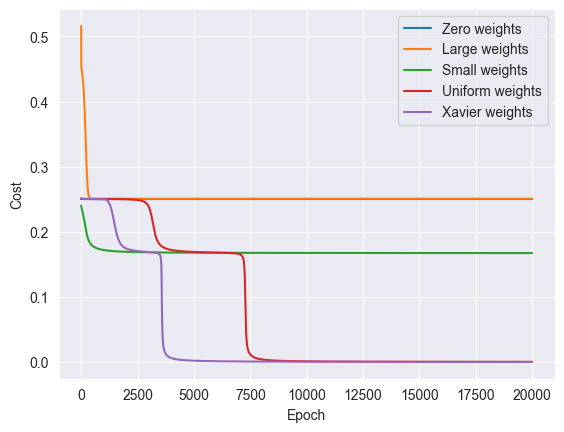

In [11]:
sns.set_style("darkgrid")
plt.plot(error_history_zero_weights, label="Zero weights")
plt.plot(error_history_large_weights, label="Large weights")
plt.plot(error_history_small_weights, label="Small weights")
plt.plot(error_history_uniform_weights, label="Uniform weights")
plt.plot(error_history_xavier_weights, label="Xavier weights")
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.legend()
plt.show()

### Visualizing perks of Xavier initialization

# Task 3 - Perks of Xavier initialization

There are generally two rules of thumb when initializing parameters in a neural network.
- The mean of the activations should be zero: $E[a^{[l-1]}] = E[a^{[l]}]$
- The variance of the activations should stay the same across every layer: $Var(a^{[l-1]}) = Var(a^{[l]})$

### Given
- The above two rules of thumb
- The XOR-dataset
- A NN with the following architecture:

| Layer | Output Shape | Activation function |
|:-----:|:------------:|---------------------|
| Input |    (2, 100)    |         Tanh        |
| Dense |    (100, 100)    |         Tanh        |
| Dense |    (100, 100)    |         Tanh        |
| Dense |    (100, 100)    |         Tanh        |
| Dense |    (100, 1)    |       Sigmoid       |

### Find
- The histograms of the activations for every 1000nd activation layer, when initialized with Xavier and Uniform

### Solution

Leveraging the same layers as above, we can easily define the new neural network and train it on the same data. After visualizing it, we can confirm that initializing it using the Xavier-method, qualitatively both two rules of thumb are sustained.



In [16]:
LEARNING_RATE = 0.01
MOMENTUM = 0.9
EPOCHS = 10000
VISUALIZE_INTERVAL = 100

WEIGHT_INIT = xavier_init
BIAS_INIT = zeros_init

network = [
    Dense(2, 100, WEIGHT_INIT, BIAS_INIT),
    Tanh(),
    Dense(100, 100, WEIGHT_INIT, BIAS_INIT),
    Tanh(),
    Dense(100, 100, WEIGHT_INIT, BIAS_INIT),
    Tanh(),
    Dense(100, 100, WEIGHT_INIT, BIAS_INIT),
    Tanh(),
    Dense(100, 1, WEIGHT_INIT, BIAS_INIT),
    Sigmoid()
]

In [14]:
activations = {}

for epoch in range(EPOCHS):
    error = 0
    for x, y in zip(X, Y):
        # Forward pass
        output = x
        for index, layer in enumerate(network):
            output = layer.forward(output)
            if (layer.__class__ == Dense):
                key = int(index / 2)
                if key not in activations:
                    activations[key] = []
                activations[key].append(output)
        
        # Calculate error
        error += mse(y, output)

        # Backward pass
        grad = mse_prime(y, output)
        
        for layer in reversed(network):
            grad = layer.backward(grad, LEARNING_RATE)
        
    error /= len(X)
    if (epoch % VISUALIZE_INTERVAL == 0):
        print(f"Epoch {epoch}, error: {error}")

Epoch 0, error: 0.2503407562240223
Epoch 100, error: 0.25031449260392635
Epoch 200, error: 0.25028814991354964
Epoch 300, error: 0.25026087999015645
Epoch 400, error: 0.25023177197004937
Epoch 500, error: 0.2501997855897093
Epoch 600, error: 0.25016366777217586
Epoch 700, error: 0.25012183953618083
Epoch 800, error: 0.25007223356271396
Epoch 900, error: 0.25001205034109425
Epoch 1000, error: 0.24993737799023574
Epoch 1100, error: 0.2498425778519011
Epoch 1200, error: 0.24971925401950257
Epoch 1300, error: 0.24955445403786009
Epoch 1400, error: 0.2493273828372909
Epoch 1500, error: 0.24900308951570976
Epoch 1600, error: 0.24851962714816814
Epoch 1700, error: 0.24776025284828307
Epoch 1800, error: 0.24648929138422215
Epoch 1900, error: 0.24419658302395297
Epoch 2000, error: 0.23971930317700102
Epoch 2100, error: 0.2303360473750638
Epoch 2200, error: 0.20729851420443424
Epoch 2300, error: 0.11544331763695351
Epoch 2400, error: 0.018065692790202433
Epoch 2500, error: 0.005438759599202984
E

/Users/olestole/code/ntnu/visual_intelligence/parameter-initialization/utils.py:34: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i], hist=True, kde=False, bins=num_bins, ax=axs[i])


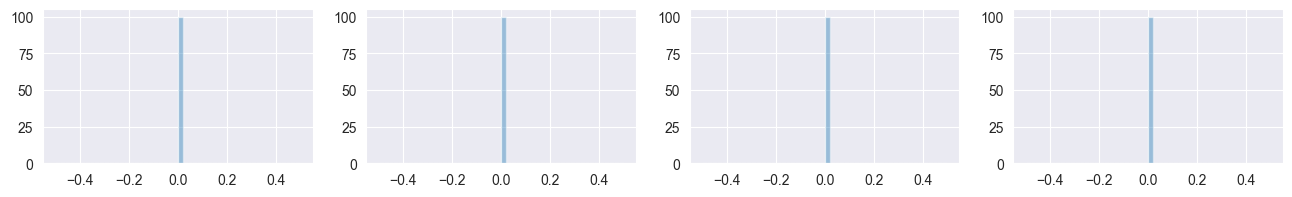

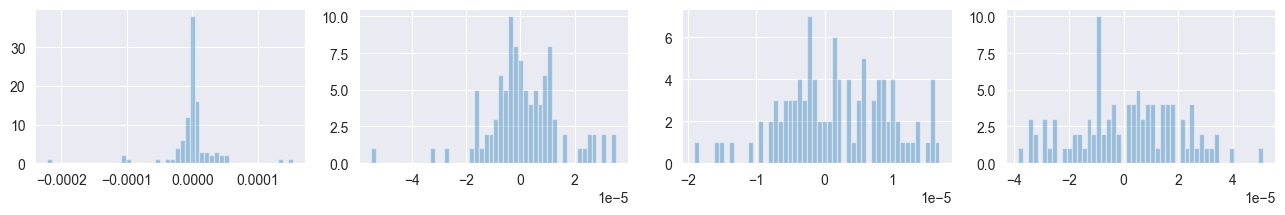

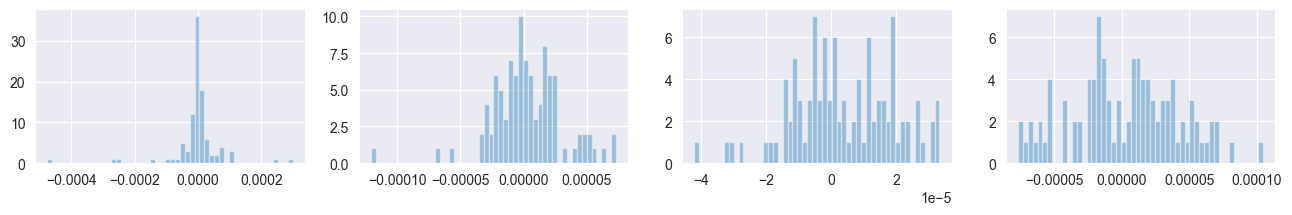

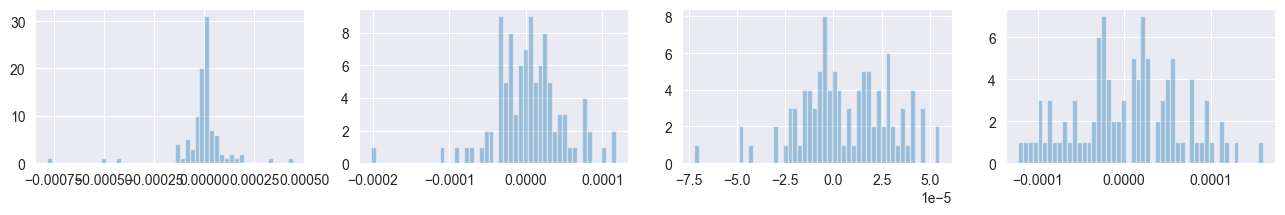

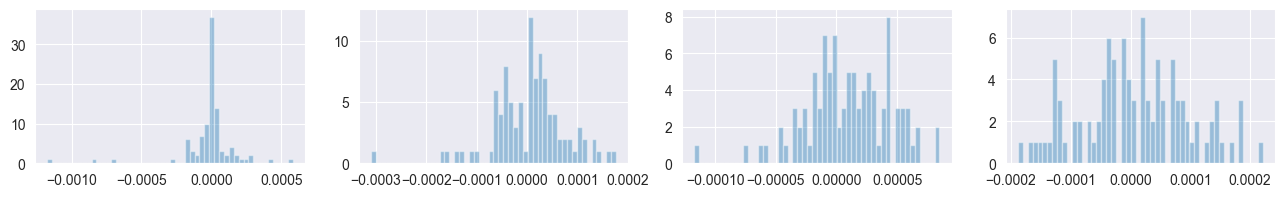

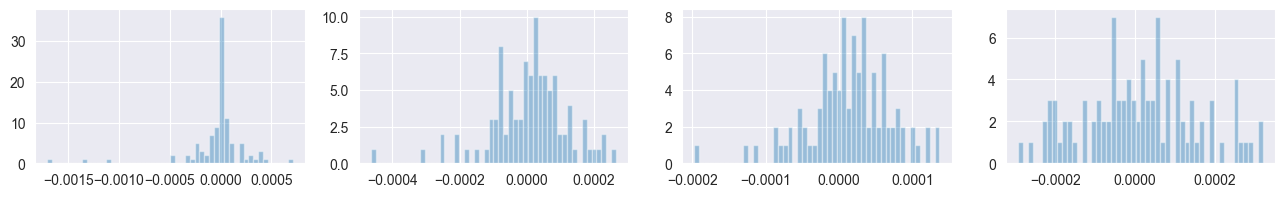

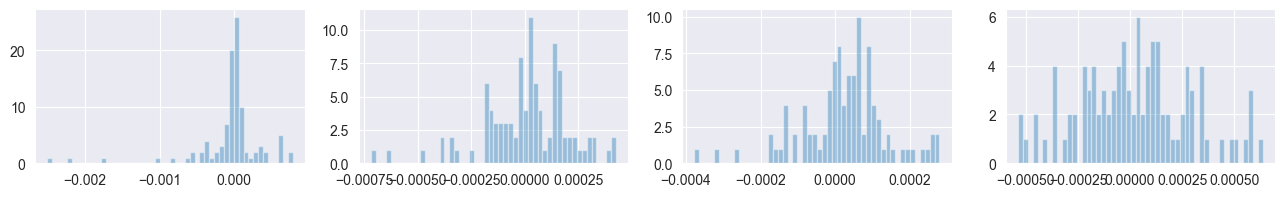

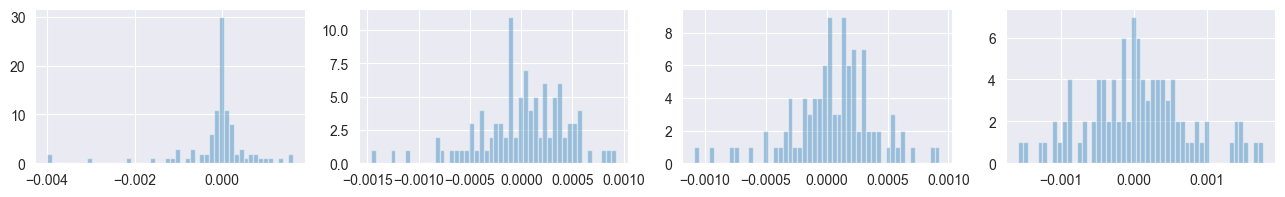

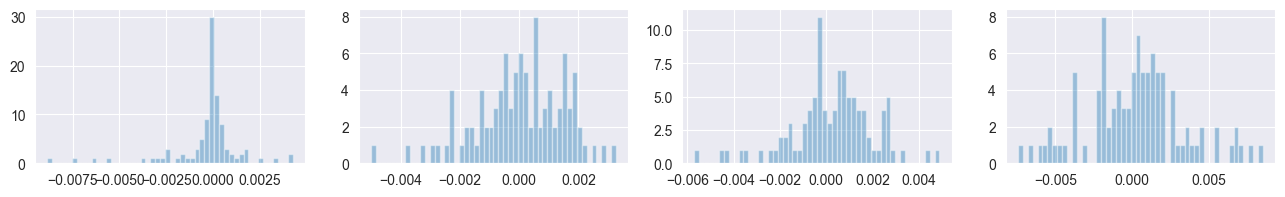

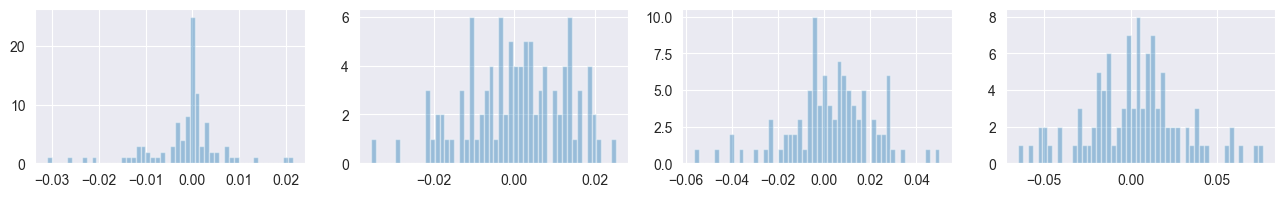

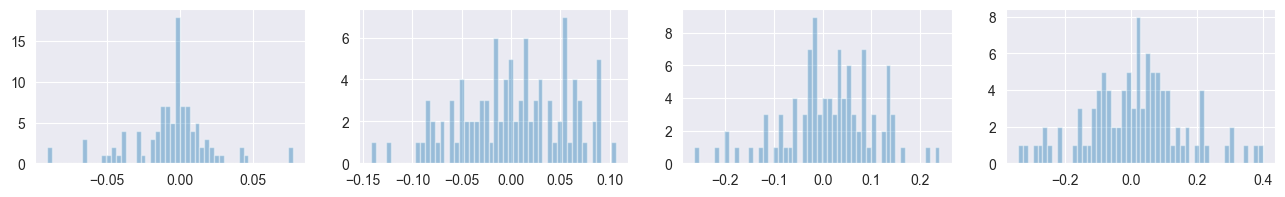

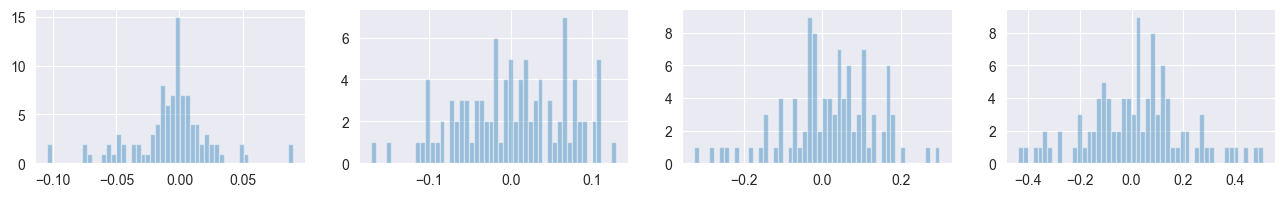

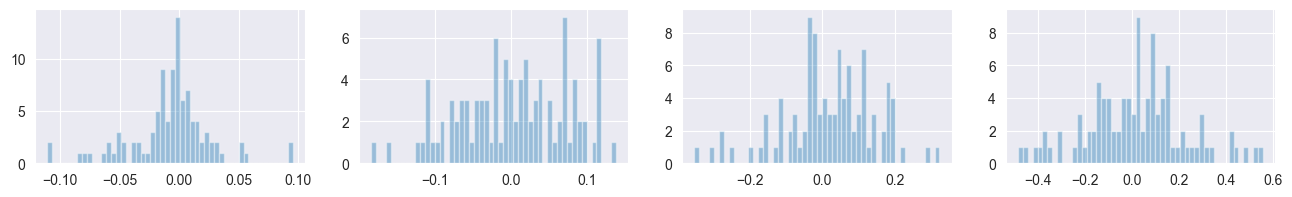

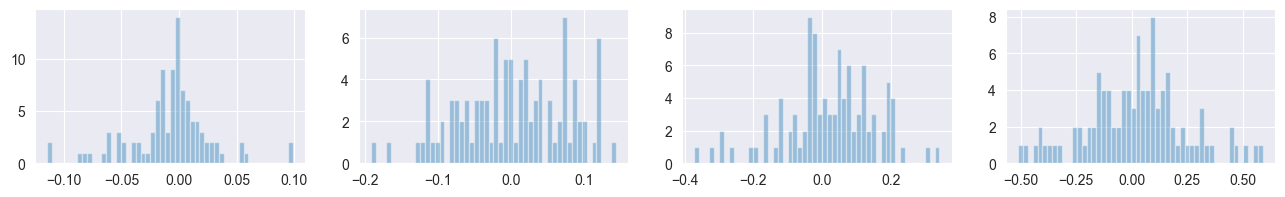

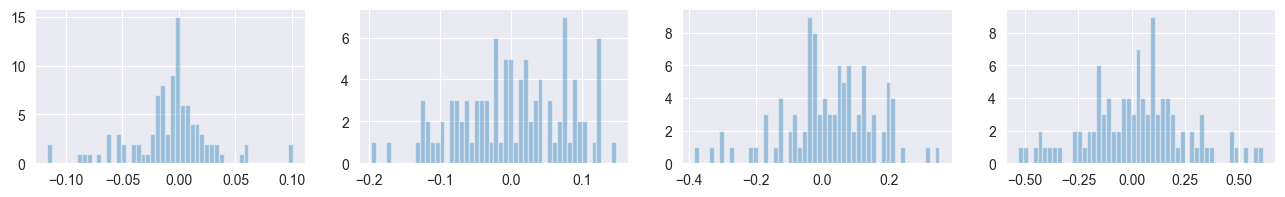

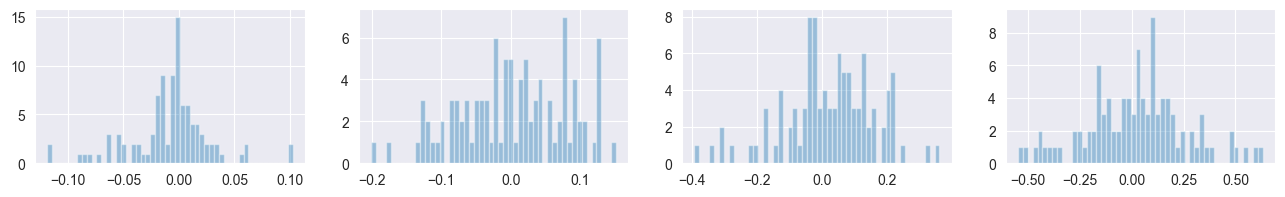

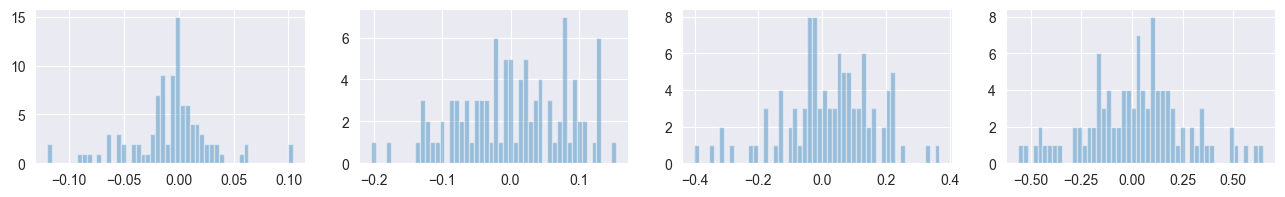

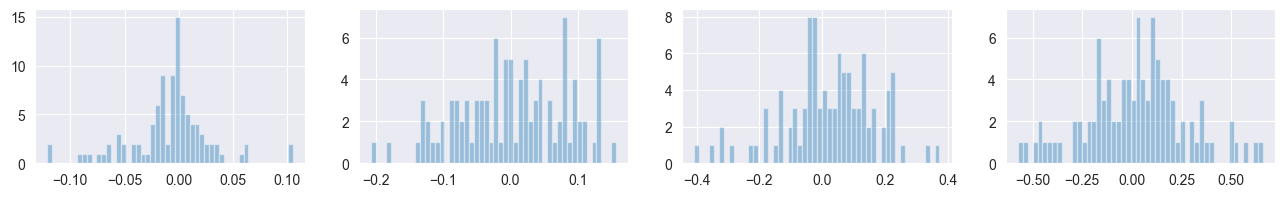

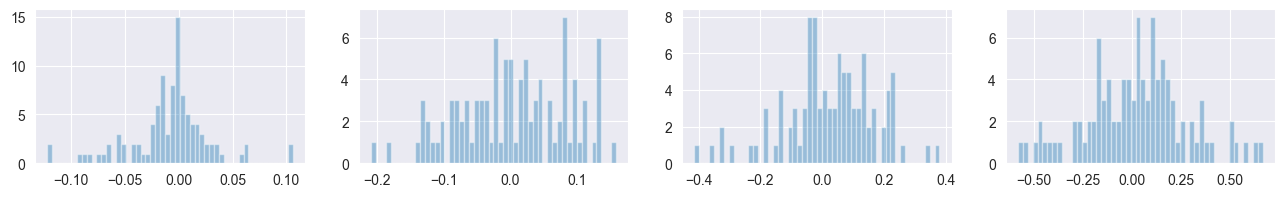

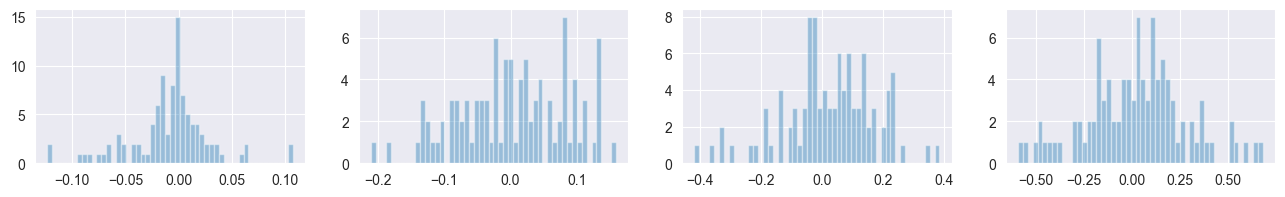

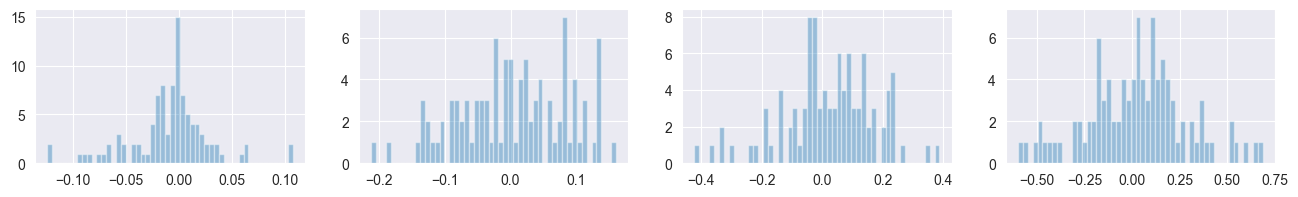

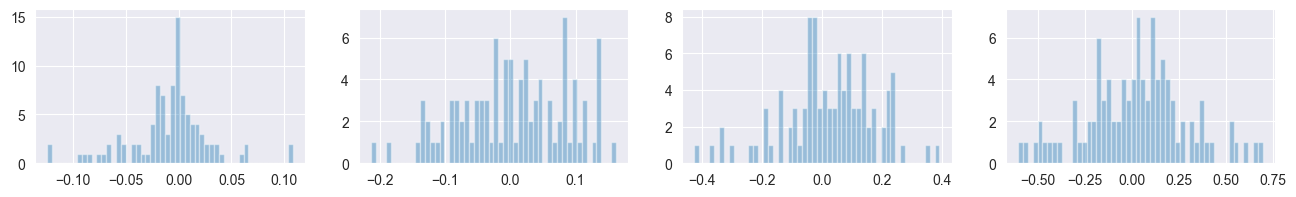

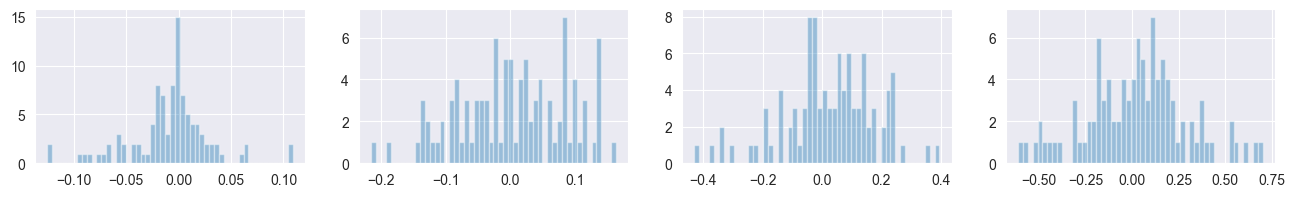

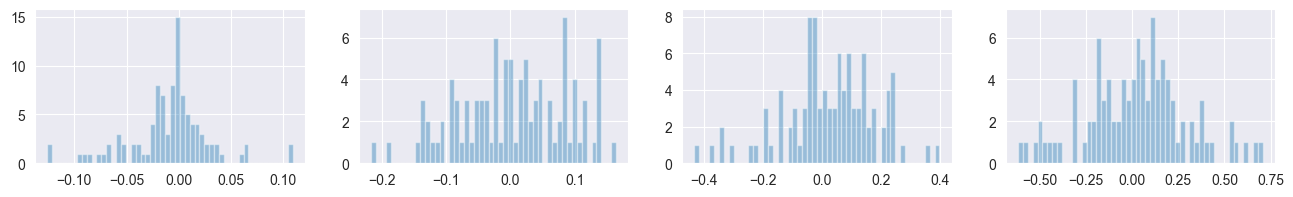

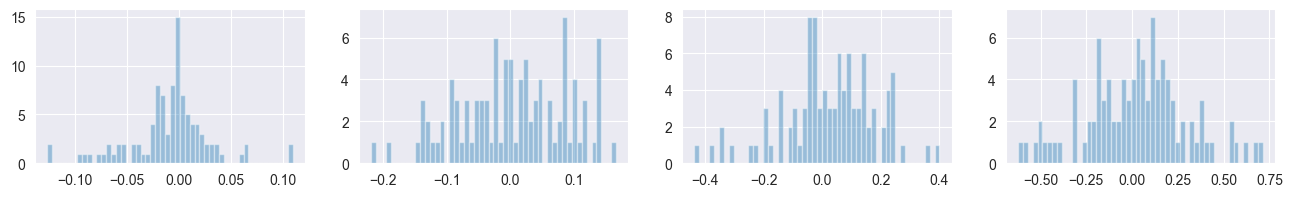

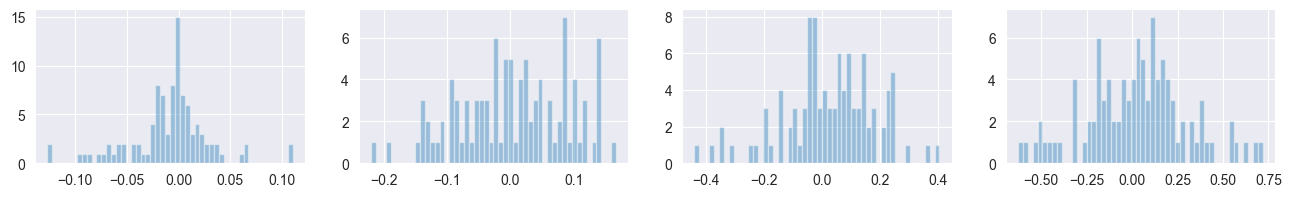

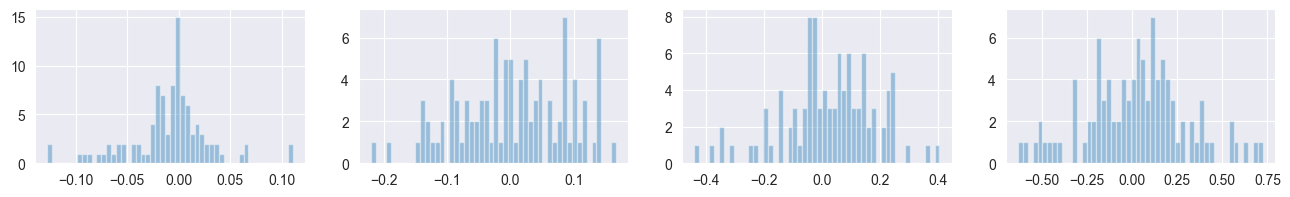

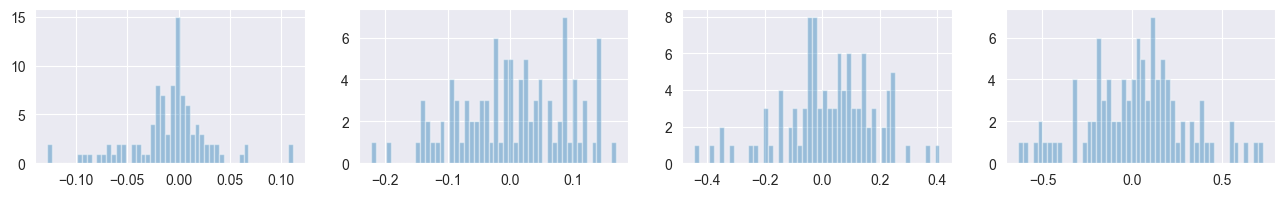

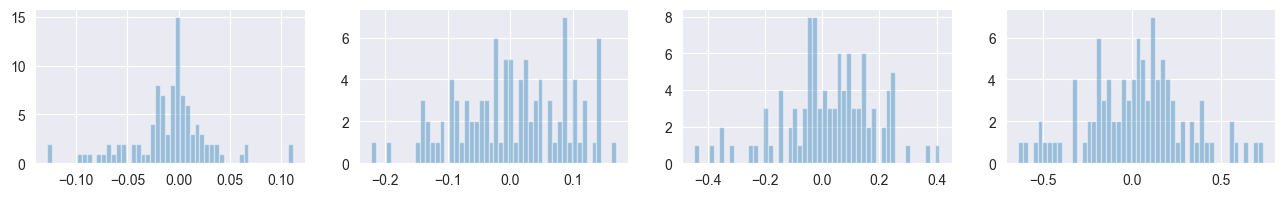

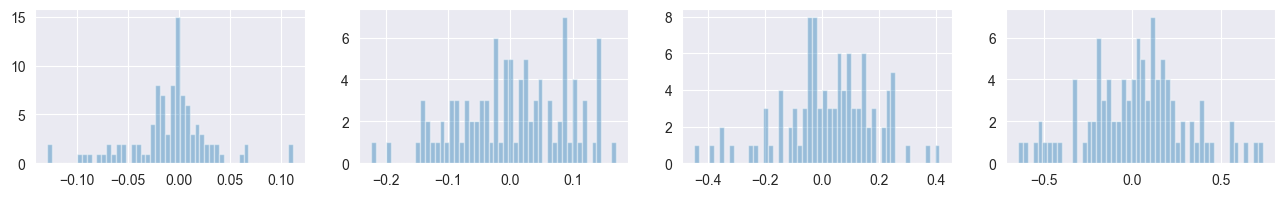

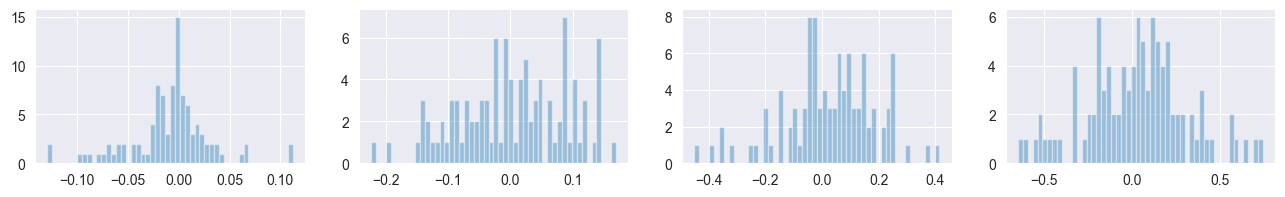

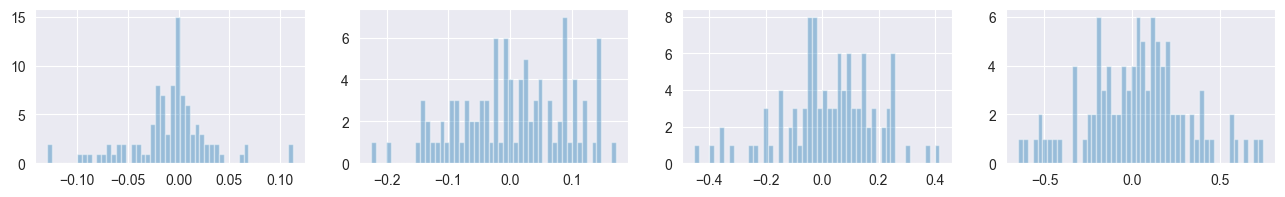

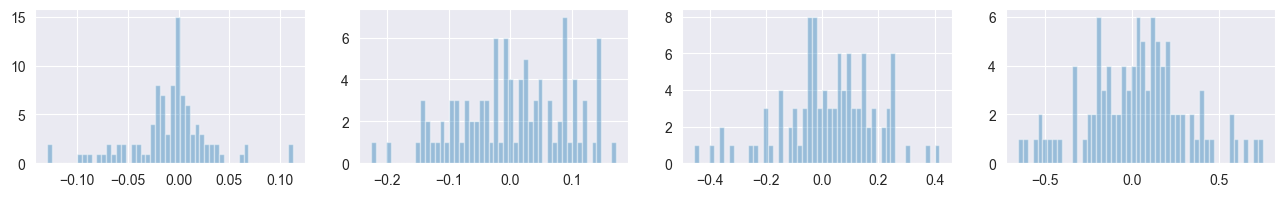

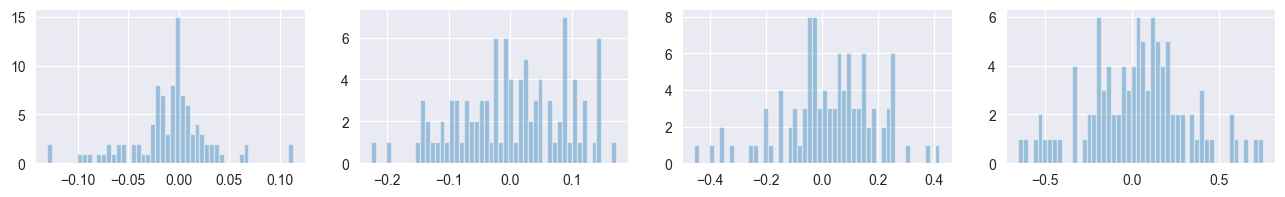

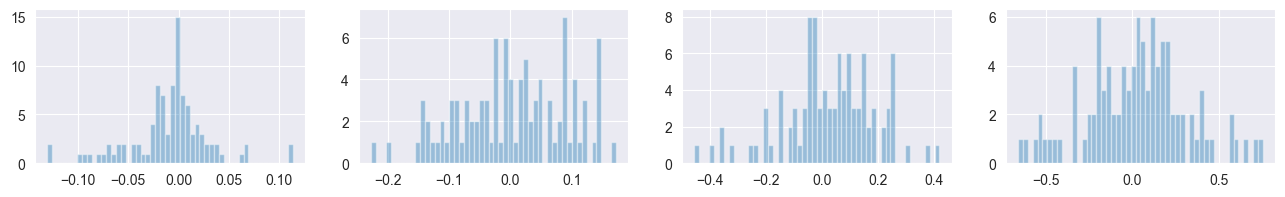

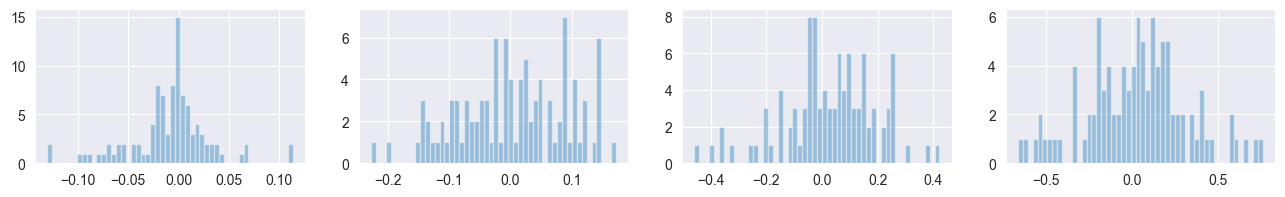

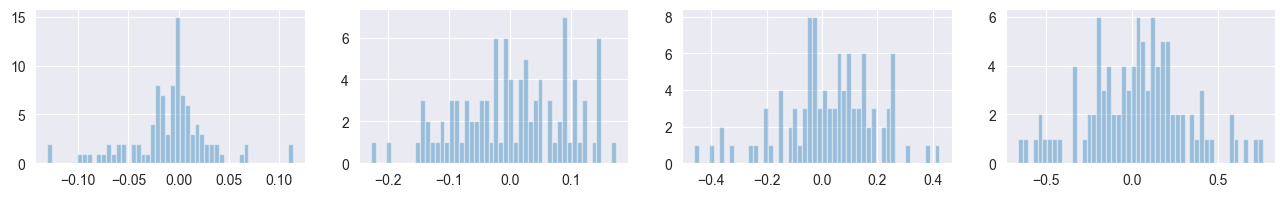

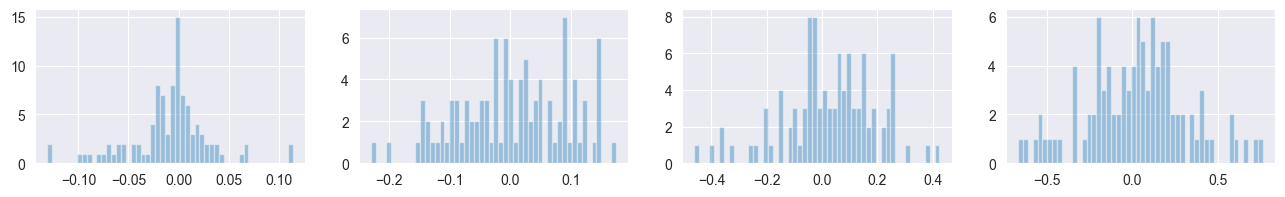

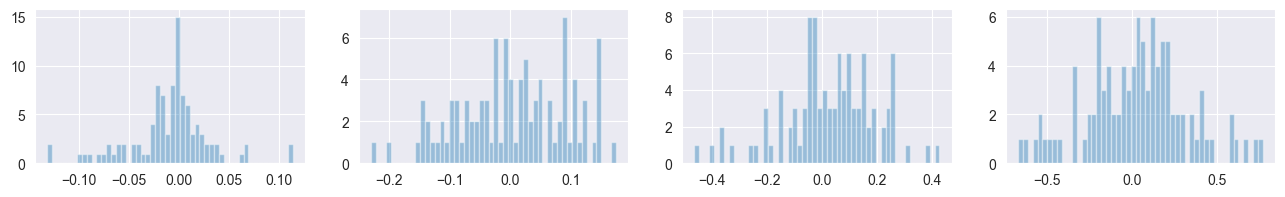

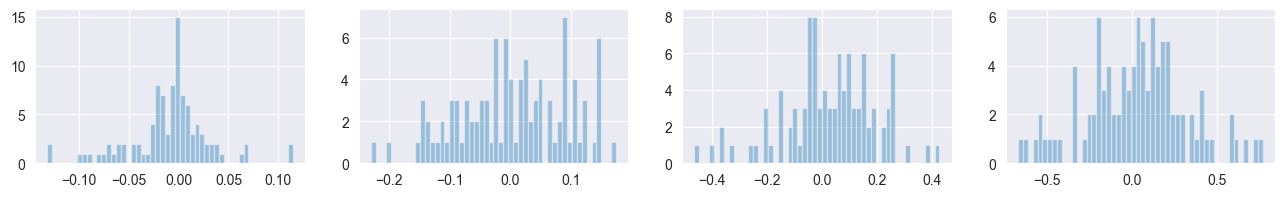

In [15]:
for epoch_number in range(0, len(activations[0]), 1000):
    activation_data = []
    for layer_index in range(len(activations) - 1):
        activation_data.append(activations[layer_index][epoch_number])

    utils.sns_plot_histograms(activation_data, num_bins=50, figsize=(16, 2))